In [1]:
!pip install wordcloud


In [2]:
#importing important libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud as wd
import ast
import matplotlib.pyplot as plt

In [3]:
# Task 1 :- load the Dataset and use read_csv function and see Top rows
movies_data=pd.read_csv(r"C:/Users/suman/Desktop/edugrad courses/ml_dataset/ml_dataset/movies_metadata.csv") 

C:\Users\suman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
#task 2: analyse the data or exploratory analaysis of data
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [6]:
movies_data.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [7]:
#basic statistics 
movies_data.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [8]:
#to check number of rows and column
movies_data.shape

(45466, 24)

the number of rows is 45466 and column is 24 in  which four column are of float or numeric type on which basic statistics is performed

In [9]:
#task 3: fixing bad data
#part a - check null and nan values of each and every column and replace with the mean of the column
#to check null values and nan values
movies_data.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

our main column on which we have to work is vote
-average ,vote_count , genres , id etc. for this we have to remove the null values or remove it from cell
we have only 4 numeric column i.e, revenue, runtime, vote_count, vote_average having null values for this we have to replace null value with mean of that column

In [10]:
# data cleaning for genres column
movies_data['genres'].head()


0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [11]:
#task 4: 
# a = each movie has multiple generes and task is to seperate the generes and syore them in corresponding to each row in df
#getting 0th vlaue of genres column and we observe that its data is string of list of dictionaires 

movies_data['genres'].values[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [12]:
#now to covert into suitable form for processing we need to convet string of dict to dict type for this we use literal eval func
#filna fills na (not applicable ) value with string of empty list and literal eval used for converting string into list.

movies_data['genres']=movies_data['genres'].fillna('[]').apply(ast.literal_eval)

In [13]:
#it is used for error handling replacing na values with empty list
movies_data['genres']=movies_data['genres'].apply(lambda x: [ i['name'] for i in x] if isinstance(x,list) else [])

In [14]:
movies_data['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [15]:
#to find min no. of average and vote count to be a part of recommender system 
vote_c=movies_data[movies_data['vote_count'].notnull()]['vote_count'].astype(int)
vote_a=movies_data[movies_data['vote_average'].notnull()]['vote_average'].astype(int)

In [16]:
vote_c.head()

0    5415
1    2413
2      92
3      34
4     173
Name: vote_count, dtype: int32

In [17]:
vote_a.head()

0    7
1    6
2    6
3    6
4    5
Name: vote_average, dtype: int32

In [18]:
#To store particular year into new column
movies_data['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-02-10
Name: release_date, dtype: object

In [19]:
movies_data['year']=pd.to_datetime(movies_data['release_date'],errors='coerce')
movies_data['year']=movies_data['year'].apply(lambda x: str(x).split('-')[0] if x!=np.nan else np.nan)

here we need to find out year from release date so we converted date to pandas datetime and apply lambda function to it
the lambda function takes x i.e, release date and split it on basis of - and extracts the first content only which is year if the value is not nan and if it is empty 
fill  nan

In [20]:
#year of the release of the movie and store particular year in new column
movies_data['year'].head(3)

0    1995
1    1995
2    1995
Name: year, dtype: object

In [21]:
vote_c.quantile(0.90)

160.0

In [22]:
vote_a.mean()

5.244896612406511

In [25]:
#task 5 : text visualization for this we have to split genre and store in vertical stack to visualize our categories
genre_split=movies_data.apply(lambda x: pd.Series( x['genres']), axis=1).stack().reset_index(level=1,drop=True)

In [26]:
genre_split.head(6)

0    Animation
0       Comedy
0       Family
1    Adventure
1      Fantasy
1       Family
dtype: object

In [27]:
genre_split.name='genre'
md=movies_data.drop('genres',axis=1).join(genre_split)

In [28]:
#vertical stacking
md['genre'].head(10)

0    Animation
0       Comedy
0       Family
1    Adventure
1      Fantasy
1       Family
2      Romance
2       Comedy
3       Comedy
3        Drama
Name: genre, dtype: object

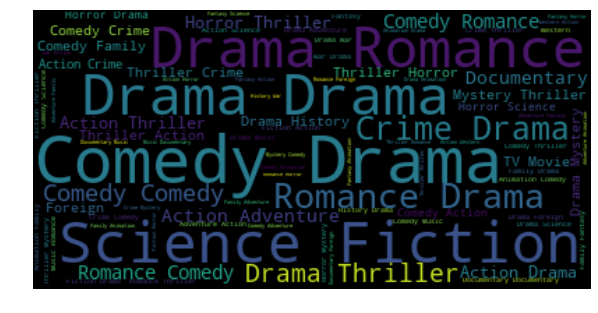

In [29]:

wordcloud=wd().generate(','.join(md[md['genre'].notnull()]['genre'].values))
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

in order to know which movie is mostly preferred by audience we have to plot a word cloud with not null values to represent the categories
for this we have to form different df of md with genre column contain not null values and join output by comma to convert it into a string since wordcloud can only applied to string object not to bytr object
and word cloud is plotted from graph it can be intuded that generally sci-fi and romance dra,a comedy are preferred by audience .


In [37]:
#task 6: recommender function
def genre_recommender(gen , percentile=0.9):
    
    
    df=md[md['genre']==gen]
    vote_c=df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_a=df[df['vote_average'].notnull()]['vote_average'].astype('int')
    c=vote_a.mean()
    m=vote_c.quantile(percentile)
    
    qualified=df[df['vote_count']>=m]
    qualified=df[df['vote_count'].notnull()]
    qualified=df[df['vote_average'].notnull()][['title','year','vote_count','vote_average','popularity']] 
   
    qualified['vote_count']=qualified['vote_count'].astype('int')
    qualified['vote_average']=qualified['vote_average'].astype('int')
    count=df['vote_count'].count()

    final_list=[]
    for i in range(count):
        final_list.append(((df['vote_count'].iloc[i]*m)/(df['vote_count'].iloc[i]+m))+((m*c)/(df['vote_count'].iloc[i]+m)))
    qualified['wr']=final_list
    #sorting data in descending order
    qualified=qualified.sort_values("wr",ascending=False)
    
    return qualified.head(15)
        

In [38]:
genre_recommender('Action')

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.1081,474.997004
12481,The Dark Knight,2008,12269,8,123.167,472.675462
14551,Avatar,2009,12114,7,185.071,472.445219
17818,The Avengers,2012,12000,7,89.8876,472.272232
26565,Thor: Ragnarok,2017,0,0,57.2836,471.381182
23756,10.5,2004,21,5,5.53617,468.656211
26555,Star Wars: The Force Awakens,2015,7993,7,31.626,467.790992
18252,The Dark Knight Rises,2012,9263,7,20.5826,466.905146
2458,The Matrix,1999,9079,7,33.3663,466.434210
20836,Superman: Unbound,2013,109,6,7.38912,466.095776


In [39]:
genre_recommender('Family')

,title,year,vote_count,vote_average,popularity,wr
4766,Harry Potter and the Philosopher's Stone,2001,7188,7,38.1872,475.955340
13724,Up,2009,7048,7,19.3309,475.337626
30315,Inside Out,2015,6737,7,23.9856,473.880013
15472,Despicable Me,2010,6595,7,22.2745,473.172042
12704,WALL·E,2008,6439,7,16.0884,472.360914
6232,Finding Nemo,2003,6292,7,25.4978,471.562531
24455,Big Hero 6,2014,6289,7,213.85,471.545878
1225,Back to the Future,1985,6239,8,25.7785,471.266147
4756,"Monsters, Inc.",2001,6150,7,26.42,470.757833
17437,Harry Potter and the Deathly Hallows: Part 2,2011,6141,7,24.9907,470.705674


In [42]:
genre_recommender('Romance')

,title,year,vote_count,vote_average,popularity,wr
351,Forrest Gump,1994,8147,8,48.3072,164.714840
1639,Titanic,1997,7770,7,26.8891,164.558818
42222,Beauty and the Beast,2017,5530,6,287.253654,163.206019
19731,Silver Linings Playbook,2012,4840,7,14.4881,162.545507
40882,La La Land,2016,4745,7,19.681686,162.440036
23437,Maleficent,2014,4607,7,19.4674,162.279350
22168,Her,2013,4215,7,13.8295,161.767716
41536,Passengers,2016,4134,6,20.303632,161.650372
20910,The Great Gatsby,2013,3885,7,17.5989,161.260276
23512,The Fault in Our Stars,2014,3868,7,16.2747,161.231888


In [41]:
genre_recommender('Drama')

,title,year,vote_count,vote_average,popularity,wr
12481,The Dark Knight,2008,12269,8,123.167,153.135063
22880,An Amish Murder,2013,17,5,6.19377,152.957153
20056,The Public Woman,1984,17,6,3.44994,152.783202
2843,Fight Club,1999,9678,8,63.8696,152.643651
18252,The Dark Knight Rises,2012,9263,7,20.5826,152.539820
314,The Shawshank Redemption,1994,8358,8,51.6454,152.278283
351,Forrest Gump,1994,8147,8,48.3072,152.209109
1639,Titanic,1997,7770,7,26.8891,152.076344
10122,Batman Begins,2005,7511,7,28.5053,151.977566
30053,Night Hair Child,1972,4,5,0.447702,151.950115


In [46]:
genre_recommender('Thriller')

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.1081,378.488611
12481,The Dark Knight,2008,12269,8,123.167,377.017394
26554,Insidious: Chapter 3,2015,1005,6,10.0988,373.912313
18252,The Dark Knight Rises,2012,9263,7,20.5826,373.347766
25094,The Taking of Deborah Logan,2014,327,6,5.41836,372.643017
292,Pulp Fiction,1994,8670,8,140.95,372.336244
1639,Titanic,1997,7770,7,26.8891,370.520121
19261,Skyfall,2012,7718,6,20.3096,370.402867
13605,Inglourious Basterds,2009,6598,7,16.8956,367.453765
14825,Shutter Island,2010,6559,7,15.8136,367.333942


In [1]:
genre_recommender('Romantic')

NameError: name 'genre_recommender' is not defined